<a href="https://colab.research.google.com/github/vinayakpotdar2114/Corona-Virus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.



**Data Description**

The dataset consists of web scrapped data, i.e. from Twitter. The dataset consists of tweets made by users regarding Covid-19. We can see records from year 2020.

The names and usernames have been given codes to avoid any privacy concerns.

The features present in the data are --

1- Username

2- ScreenName

3- Location

4- TweetAt

5- OriginalTweet

6- Sentiment

# The Flow of Experiment

*   **Library Imports**
*   **Dataset Loading**
*   **EDA**
*   **Data Preprocessing**
*   **Vectorization**
*   **Fitting Models**
*   **Evaluation**
*   **Conclusion** 


In [49]:
# Importing Required Libraries
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Drive Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
dataset=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Corona Virus Tweet Sentiment - Potdar Vinayak/Dataset/Coronavirus Tweets.csv",encoding = 'latin')

In [5]:
dataset.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [6]:
dataset.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [9]:
dataset.describe(include= "all")

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [13]:
dataset.shape

(41157, 6)

# Null Value Analysis:

In [14]:
dataset.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

Here about 20% of Tweet Locations are missing. This wont be affecting the classification process while doing sentiment analysis. We can let this slide for now and remove later when needed.



---

---


# **Exploratory Data Analysis**

1. **When did the Tweets Started ?**

In [17]:

# Understanding when the tweets started to appear regarding Covid-19.
dataset.TweetAt.value_counts(sort= True)

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

**Findings-** The tweets regarding Covid-19 started to appear from mid of  March 2020. Here we have the data for two months i.e. March and April 2020.

2. **Origins of Tweets and Top Tweeter Locations**

In [26]:
# Number of Unique locations.
locations = list(dataset.Location.unique())
len(locations)

12221

In [63]:
loc_tweet_count = pd.DataFrame(dataset['Location'].value_counts().sort_values(ascending=False))
loc_tweet_count.reset_index(inplace=True)
loc_tweet_count.rename(columns={'index':'Location', 'Location':'Count'}, inplace=True)
top_loc=loc_tweet_count.head(15)

[Text(0, 0, 'London'),
 Text(0, 0, 'United States'),
 Text(0, 0, 'London, England'),
 Text(0, 0, 'New York, NY'),
 Text(0, 0, 'Washington, DC'),
 Text(0, 0, 'United Kingdom'),
 Text(0, 0, 'Los Angeles, CA'),
 Text(0, 0, 'India'),
 Text(0, 0, 'UK'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'USA'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'England, United Kingdom'),
 Text(0, 0, 'Toronto, Ontario'),
 Text(0, 0, 'Global')]

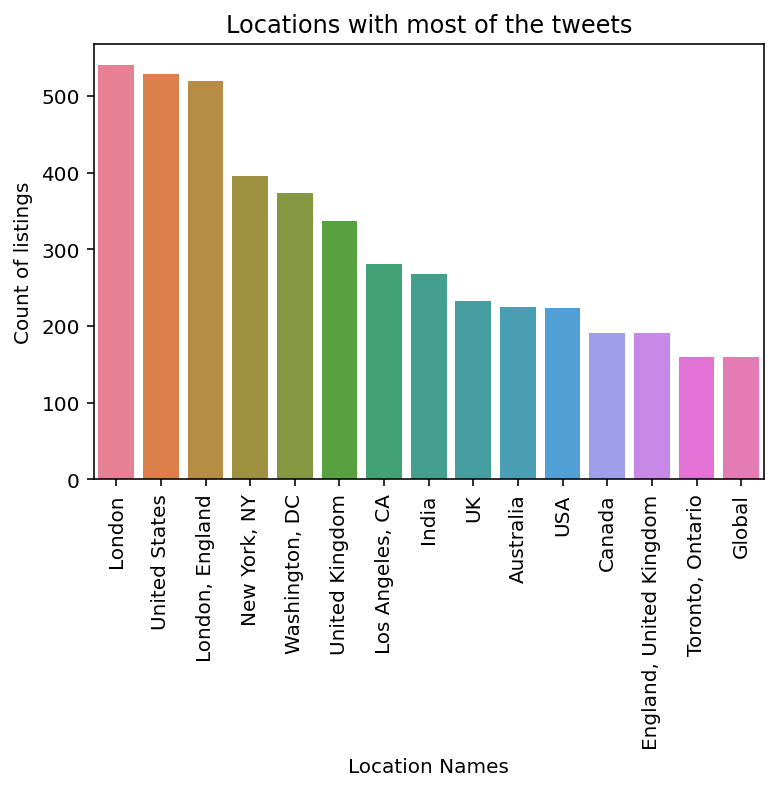

In [66]:
top_locations=sns.barplot(x="Location", y="Count", data=top_loc,palette='husl')
top_locations.set_title('Locations with most of the tweets')
top_locations.set_ylabel('Count of listings')
top_locations.set_xlabel('Location Names')
top_locations.set_xticklabels(top_locations.get_xticklabels(), rotation=90)

**Findings** Here we can see the top tweeting locations from the dataset. London being the most tweeting locatioin from the bunch. We can see some peculiarity in the dataset i.e. "London" and "London, England" are represented as two different locations. This can be ignored as this wont be helping in the Sentiment Analysis process.

3. **Sentiment Distribution**

Here we will be checking if the dataset is fairly populated and is balanced. Checking the balance in the dataset can give us a direction to use evaluation metrics accordingly.

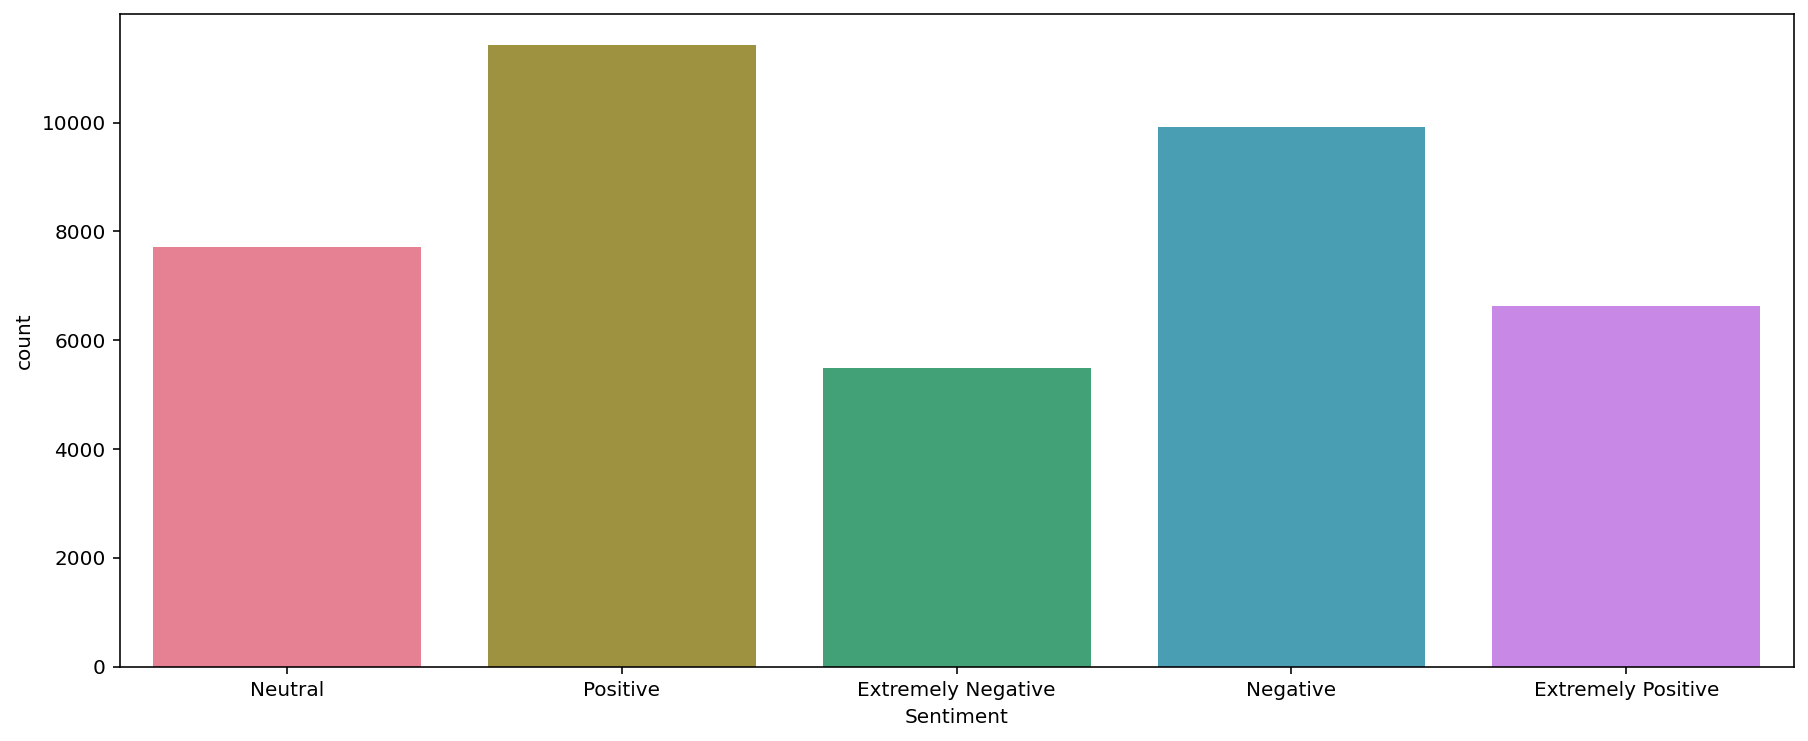

In [67]:
plt.subplots(figsize=(15,6))
sns.countplot(x='Sentiment', data=dataset,palette="husl")